THIS CODE IS ALL ABOUT NOVEL ORONAVIRUS PREDICTIVE DATA OF PORTUGAL

# Packages + Get Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import date
from pandas import datetime
%matplotlib inline
%config IPCompleter.greedy=True
import plotly.express as px
import plotly.graph_objects as go

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [3]:
import io
def parser(x):
    return datetime.strptime(x, '%d-%m-%Y') 

covid_data = pd.read_csv(io.BytesIO(uploaded['data.csv']), parse_dates=[0], date_parser=parser)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.



In [4]:
covid_data.tail(3)

,data,data_dados,confirmados,confirmados_arsnorte,confirmados_arscentro,confirmados_arslvt,confirmados_arsalentejo,confirmados_arsalgarve,confirmados_acores,confirmados_madeira,confirmados_estrangeiro,confirmados_novos,recuperados,obitos,internados,internados_uci,lab,suspeitos,vigilancia,n_confirmados,cadeias_transmissao,transmissao_importada,confirmados_0_9_f,confirmados_0_9_m,confirmados_10_19_f,confirmados_10_19_m,confirmados_20_29_f,confirmados_20_29_m,confirmados_30_39_f,confirmados_30_39_m,confirmados_40_49_f,confirmados_40_49_m,confirmados_50_59_f,confirmados_50_59_m,confirmados_60_69_f,confirmados_60_69_m,confirmados_70_79_f,confirmados_70_79_m,confirmados_80_plus_f,confirmados_80_plus_m,...,sintomas_dores_musculares,sintomas_fraqueza_generalizada,confirmados_f,confirmados_m,obitos_arsnorte,obitos_arscentro,obitos_arslvt,obitos_arsalentejo,obitos_arsalgarve,obitos_acores,obitos_madeira,obitos_estrangeiro,recuperados_arsnorte,recuperados_arscentro,recuperados_arslvt,recuperados_arsalentejo,recuperados_arsalgarve,recuperados_acores,recuperados_madeira,recuperados_estrangeiro,obitos_0_9_f,obitos_0_9_m,obitos_10_19_f,obitos_10_19_m,obitos_20_29_f,obitos_20_29_m,obitos_30_39_f,obitos_30_39_m,obitos_40_49_f,obitos_40_49_m,obitos_50_59_f,obitos_50_59_m,obitos_60_69_f,obitos_60_69_m,obitos_70_79_f,obitos_70_79_m,obitos_80_plus_f,obitos_80_plus_m,obitos_f,obitos_m
37,2020-04-03,03-04-2020 00:00,9886,5899,1286,2347,62,179,63,50,NaN,852,68,246,1058.0,245.0,5392.0,74377,22556.0,59099.0,NaN,576.0,65.0,68.0,132.0,104.0,580.0,425.0,825.0,648.0,1093.0,734.0,1025.0,761.0,679.0,646.0,420.0,525.0,690.0,466.0,...,0.33,0.25,5509.0,4377.0,130,61,51,1,3,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,7.0,3.0,18.0,23.0,35.0,73.0,83.0,103.0,143.0
38,2020-04-04,04-04-2020 00:00,10524,6280,1372,2513,63,182,63,51,NaN,638,75,266,1075.0,251.0,5518.0,81087,22858.0,65045.0,NaN,603.0,74.0,76.0,137.0,115.0,632.0,450.0,877.0,690.0,1157.0,771.0,1095.0,813.0,723.0,673.0,450.0,549.0,747.0,495.0,...,0.32,0.25,5892.0,4632.0,141,66,54,0,5,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,6.0,4.0,20.0,22.0,38.0,86.0,84.0,117.0,149.0
39,2020-04-05,05-04-2020 00:00,11278,6530,1442,2904,82,201,67,52,NaN,754,75,295,1084.0,267.0,4962.0,86370,23209.0,70130.0,NaN,619.0,81.0,81.0,153.0,123.0,692.0,487.0,933.0,738.0,1232.0,826.0,1170.0,863.0,777.0,714.0,479.0,580.0,817.0,532.0,...,0.32,0.25,6334.0,4944.0,158,72,58,0,7,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,6.0,6.0,21.0,24.0,42.0,92.0,98.0,127.0,168.0


In [5]:
fig0 = px.line(covid_data, x="data", y="lab", title='Novos Casos em Portugal')
fig0.show()

# Tratamento de Dados

In [0]:
covid = covid_data[['data', 'confirmados_novos']]

In [0]:
covid.head()

,data,confirmados_novos
0,2020-02-26,0
1,2020-02-27,0
2,2020-02-28,0
3,2020-02-29,0
4,2020-03-01,0


In [0]:
covid_treated = covid[covid['confirmados_novos'] >0]
covid_treated.reset_index(inplace=True)
covid_treated.head()

,index,data,confirmados_novos
0,5,2020-03-02,2
1,6,2020-03-03,2
2,7,2020-03-04,2
3,8,2020-03-05,3
4,9,2020-03-06,4


In [0]:
#Se quiser manipular algum resultado
#covid_treated.at[28, 'confirmados_novos'] = 446#782
#covid_treated.at[29, 'confirmados_novos'] = 1035#699

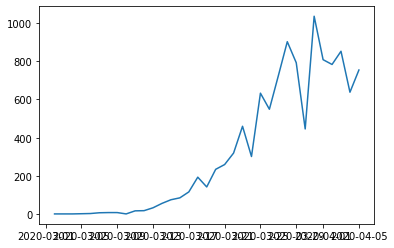

In [0]:
plt.plot('data', 'confirmados_novos' , data=covid_treated)

In [0]:
fig = px.line(covid_treated, x="data", y="confirmados_novos", title='Novos Casos em Portugal')
fig.show()

# Estudar o modelo ARIMA

ARIMA MODEL ANALYSIS

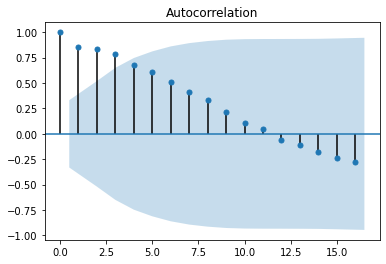

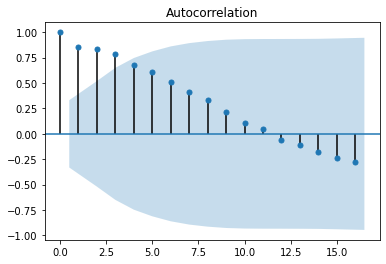

In [0]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import metrics
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error 
plot_acf(covid_treated.confirmados_novos)
#tem tendencia. não é stationary para timeseries forecasting

In [0]:
covid_diff = covid_treated.confirmados_novos.diff(periods=1)
covid_diff1 = covid_diff[1:]
covid_diff1.head()

1    0.0
2    0.0
3    1.0
4    1.0
5    4.0
Name: confirmados_novos, dtype: float64

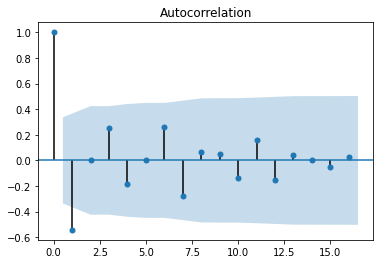

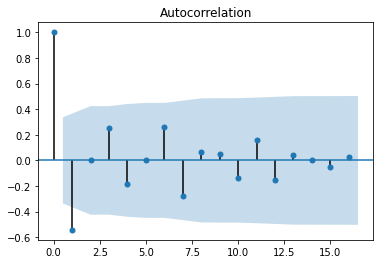

In [0]:
#testar o segundo parametro do ARIMA Model - d = 1 diff
plot_acf(covid_diff1)

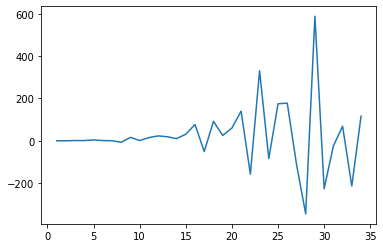

In [0]:
covid_diff1.plot()

In [0]:
#divide test and train sem shuffle
X = covid_treated.confirmados_novos
xTrain, xTest= train_test_split(X, test_size = 0.1, shuffle=False)

In [0]:
xTrain.shape

(31,)

In [0]:
xTest.shape

(4,)

In [0]:
model_ar = AR(xTrain)
model_ar_fit = model_ar.fit()

In [0]:
predictions = model_ar_fit.predict(start=31, end=34)

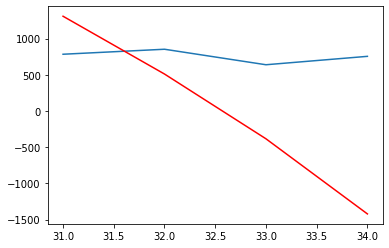

In [0]:
plt.plot(xTest)
plt.plot(predictions, color='red')

IF WE DIDN'T DO ANYTHING THIS IS THE OUTCOME - *NOT SO GOOD*

In [0]:
#p = periods taken for autoregressive model
#d = diff. integrated order. how many times difference is done
#q = moving average. periods in moving average model
model_arima = ARIMA(xTrain, order=(1,1,1))
model_arima_fit = model_arima.fit()

In [0]:
predictions_arima = model_arima_fit.forecast(steps=4)[0]
predictions_arima

array([907.77253923, 912.92582927, 950.99006348, 977.6070472 ])

In [0]:
Test = xTest.reset_index()

In [0]:
Test.drop('index', axis=1, inplace=True)

381.68199305128013


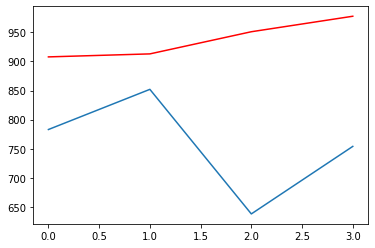

In [0]:
plt.plot(Test)
plt.plot(predictions_arima, color='red')
print(model_arima_fit.aic)

# Encontrar os melhores Parâmetros

1ª tentativa a encontrar os melhores parametros

In [0]:
import itertools
p=d=q=range(0,10)
pdq = list(itertools.product(p,d,q))

In [0]:
parameters = []

In [0]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
  try:
      model_arima = ARIMA(xTrain, order=param)
      model_arima_fit = model_arima.fit()
      parameters.append((param,  model_arima_fit.aic))
  except:
    continue

In [0]:
parametrosDF = pd.DataFrame(parameters)
parametros = parametrosDF.loc[(parametrosDF[1] > 20)]

In [0]:
print(parametros[parametros[1] == parametros[1].min()]) 

            0           1
21  (2, 2, 1)  371.093253


In [0]:
model_arima_final = ARIMA(xTrain, order=(2,2,1))
model_arima_fit_final = model_arima_final.fit()
predictions_arima_final = model_arima_fit_final.forecast(steps=4)[0]

371.09325336017616


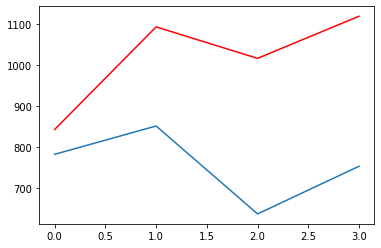

In [0]:
plt.plot(Test)
plt.plot(predictions_arima_final, color='red')
print(model_arima_fit_final.aic)

In [0]:
predictions_arima_final

array([ 843.52597026, 1093.15386768, 1016.56608249, 1119.0494708 ])

In [0]:
forecast = pd.DataFrame(predictions_arima_final)
frames = [Test, forecast]
result = pd.concat(frames, axis=1, sort=False)
result['modelo'] = result[0]
result

,confirmados_novos,0,modelo
0,783,843.525970,843.525970
1,852,1093.153868,1093.153868
2,638,1016.566082,1016.566082
3,754,1119.049471,1119.049471


In [0]:
fig2 = go.Figure()
fig2.add_trace(go.Scatter( y = result['confirmados_novos'],
                    mode='lines',
                    name='lines'))
fig2.add_trace(go.Scatter( y = result['modelo'],
                    mode='lines+markers',
                    name='lines+markers'))

fig2.update_layout(title='Comparação do Fitting do Modelo vs. Real',
                   xaxis_title='Data',
                   yaxis_title='Quantidade de Novos Casos')
fig2.show()

In [0]:
#covid_treated.drop('Forecast', axis=1, inplace=True)
#covid_treated.head()
#covid_treated_comp['Forecast'] = covid_treated['confirmados_novos']
#covid_treated.at[28, 'confirmados_novos'] = 446#782
#covid_treated.at[29, 'confirmados_novos'] = 1035#699
#df.insert(2, "Age", [21, 23, 24, 21], True)

,index,data,confirmados_novos
0,5,2020-03-02,2
1,6,2020-03-03,2
2,7,2020-03-04,2
3,8,2020-03-05,3
4,9,2020-03-06,4


In [0]:
covid_treated.insert(3, "Forecast", covid_treated['confirmados_novos'], True )
covid_treated.tail()

,index,data,confirmados_novos,Forecast
30,35,2020-04-01,808,808
31,36,2020-04-02,783,783
32,37,2020-04-03,852,852
33,38,2020-04-04,638,638
34,39,2020-04-05,754,754


In [0]:
covid_treated.at[31, 'Forecast'] = result['modelo'][0]
covid_treated.at[32, 'Forecast'] = result['modelo'][1]
covid_treated.at[33, 'Forecast'] = result['modelo'][2]
covid_treated.at[34, 'Forecast'] = result['modelo'][3] 
covid_treated.tail()

,index,data,confirmados_novos,Forecast
30,35,2020-04-01,808,808
31,36,2020-04-02,783,843
32,37,2020-04-03,852,1093
33,38,2020-04-04,638,1016
34,39,2020-04-05,754,1119


In [0]:
fig3 = go.Figure()
fig3.add_trace(go.Scatter( y = covid_treated['Forecast'], 
                    mode='lines+markers',
                    name='Previsão'))
fig3.add_trace(go.Scatter( y = covid_treated['confirmados_novos'],
                    mode='lines',
                    name='Casos Confirmados', 
                    ))
fig3.update_layout(title='Comparação do Fitting do Modelo vs. Real',
                   xaxis_title='Data',
                   yaxis_title='Quantidade de Novos Casos',)

fig3.show()

Não é o melhor parâmetro, apesar do indicador aic o dizer

# Adotar o modelo MSE para encontrar os melhores Parâmetros

In [0]:
import itertools
p=d=q=range(0,10)
pdq = list(itertools.product(p,d,q))
parameters = []

In [0]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
  try:
      model_arima = ARIMA(xTrain, order=param)
      model_arima_fit = model_arima.fit()
      predictions_arima_final= model_arima_fit.forecast(steps=4)[0]
      mse_calc = mean_squared_error(Test, predictions_arima_final) 
      parameters.append((param,  model_arima_fit.aic, mse_calc))
  except:
    continue

In [0]:
parametrosDF = pd.DataFrame(parameters)
parametros = parametrosDF.loc[(parametrosDF[1] > 20)]
print(parametros[parametros[2] == parametros[2].min()]) 

            0         1            2
10  (1, 1, 2)  382.6027  5545.995097


In [0]:
model_arima_final = ARIMA(xTrain, order=(1,1,2))
model_arima_fit_final = model_arima_final.fit()
predictions_arima_final = model_arima_fit_final.forecast(steps=4)[0]
mse_calc = mean_squared_error(Test, predictions_arima_final) 

382.6026997867974 5545.995097415025


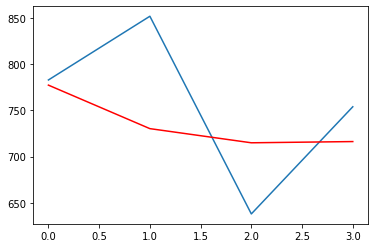

In [0]:
plt.plot(Test)
plt.plot(predictions_arima_final, color='red')
print(model_arima_fit_final.aic, mse_calc)

In [0]:
forecast = pd.DataFrame(predictions_arima_final)
frames = [Test, forecast]
result = pd.concat(frames, axis=1, sort=False)
result['modelo'] = result[0]
result

,confirmados_novos,0,modelo
0,783,777.421328,777.421328
1,852,730.327099,730.327099
2,638,715.000221,715.000221
3,754,716.323351,716.323351


In [0]:
fig4 = go.Figure()
fig4.add_trace(go.Scatter( y = result['confirmados_novos'],
                    mode='lines',
                    name='Reais'))
fig4.add_trace(go.Scatter( y = result['modelo'],
                    mode='lines+markers',
                    name='Forecast'))

fig4.update_layout(title='Comparação do Fitting do Modelo vs. Real',
                   xaxis_title='Data',
                   yaxis_title='Quantidade de Novos Casos')
fig4.show()

**Este Modelo está mais próximo dos resultados reais**

# Forecast para os próximos 3 dias

In [0]:
x = covid_treated.confirmados_novos

In [0]:
model_arima_final = ARIMA(xTrain, order=(1,1,2))
model_arima_fit_final = model_arima_final.fit()
predictions_arima_final = model_arima_fit_final.forecast(steps=7, alpha=0.05)[0]

382.6026997867974 5545.995097415025


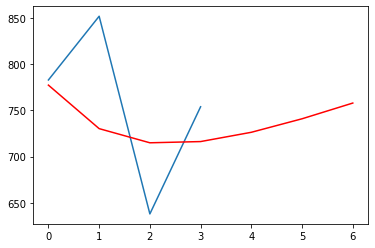

In [0]:
plt.plot(Test)
plt.plot(predictions_arima_final, color='red')
print(model_arima_fit_final.aic, mse_calc)

In [0]:
forecast = pd.DataFrame(predictions_arima_final)
frames = [Test, forecast]
result = pd.concat(frames, axis=1, sort=False)
result['modelo'] = result[0]
#result

In [0]:
result.drop(0, axis=1, inplace=True)
result

,confirmados_novos,modelo
0,783.0,777.421328
1,852.0,730.327099
2,638.0,715.000221
3,754.0,716.323351
4,NaN,726.373138
5,NaN,740.996769
6,NaN,758.017658


In [0]:
covid_treated.insert(3, "NewForecast", covid_treated['confirmados_novos'], True )

,index,data,confirmados_novos,NewForecast,Forecast
30,35,2020-04-01,808,808,808
31,36,2020-04-02,783,783,843
32,37,2020-04-03,852,852,1093
33,38,2020-04-04,638,638,1016
34,39,2020-04-05,754,754,1119


In [0]:
covid_treated.at[31, 'NewForecast'] = result['modelo'][0]
covid_treated.at[32, 'NewForecast'] = result['modelo'][1]
covid_treated.at[33, 'NewForecast'] = result['modelo'][2]
covid_treated.at[34, 'NewForecast'] = result['modelo'][3] 
covid_treated.tail()

,index,data,confirmados_novos,NewForecast,Forecast
30,35,2020-04-01,808,808,808
31,36,2020-04-02,783,777,843
32,37,2020-04-03,852,730,1093
33,38,2020-04-04,638,715,1016
34,39,2020-04-05,754,716,1119


In [0]:
covid_treated.drop('index', axis=1, inplace=True)
covid_treated.drop('Forecast', axis=1, inplace=True)

,data,confirmados_novos,NewForecast
30,2020-04-01,808,808
31,2020-04-02,783,777
32,2020-04-03,852,730
33,2020-04-04,638,715
34,2020-04-05,754,716


In [0]:
covid_treated.drop('data', axis=1, inplace=True)
covid_treated.tail()

,confirmados_novos,NewForecast
30,808,808
31,783,777
32,852,730
33,638,715
34,754,716


ERROR! Session/line number was not unique in database. History logging moved to new session 61


In [0]:
covid_treated.loc[len(covid_treated)]=['','726'] 

In [0]:
covid_treated.loc[len(covid_treated)]=['','741'] 
covid_treated.loc[len(covid_treated)]=['','758'] 

In [0]:
fig4 = go.Figure()
fig4.add_trace(go.Scatter( y = covid_treated['NewForecast'], 
                    mode='lines+markers',
                    name='Previsão'))
fig4.add_trace(go.Scatter( y = covid_treated['confirmados_novos'],
                    mode='lines',
                    name='Casos Confirmados', 
                    ))
fig4.update_layout(title='Comparação do Fitting do Modelo vs. Real (ARIMA MODEL with MSE)',
                   xaxis_title='Dias',
                   yaxis_title='Quantidade de Novos Casos',)

fig4.show()